In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
data=pd.read_csv("wpbc.data",header=None)
data=data.drop(columns=[34])

In [14]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
dtype: int64

In [15]:
# Separate features and target variable
X = data.drop(columns=[1])
y = data[1]

In [16]:
# Preprocessing
# Encoding categorical variables
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)

In [17]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Define the Classification model
classification_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compile the model
classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = classification_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.3355 - loss: 0.8230 - val_accuracy: 0.5250 - val_loss: 0.6896
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6001 - loss: 0.6688 - val_accuracy: 0.7250 - val_loss: 0.6082
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7156 - loss: 0.6212 - val_accuracy: 0.7750 - val_loss: 0.5693
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7454 - loss: 0.5871 - val_accuracy: 0.8000 - val_loss: 0.5468
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7471 - loss: 0.5675 - val_accuracy: 0.8000 - val_loss: 0.5314
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7389 - loss: 0.5415 - val_accuracy: 0.8000 - val_loss: 0.5200
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7618 - loss: 0.5201 - val_accuracy: 0.8000 - val_loss: 0.5113
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7019 - loss: 0.5635 - val_accuracy: 0.8000 - val_loss:

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


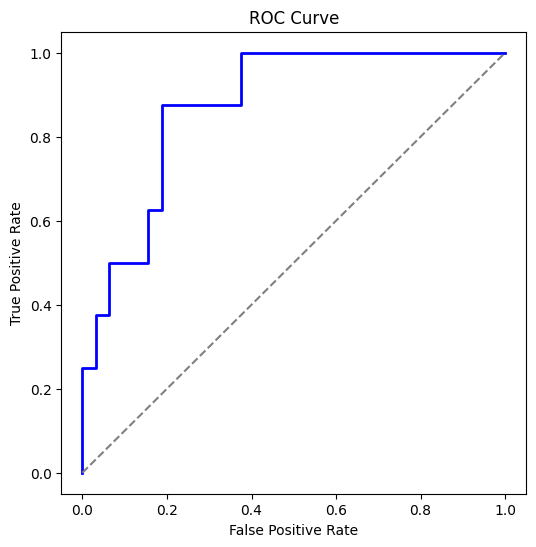

In [20]:
# Generate ROC curve
y_pred_prob = classification_model.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [21]:
# Evaluate the model on the testing set
loss, accuracy = classification_model.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

# Generate confusion matrix
y_pred = np.round(y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8313 - loss: 0.7107  
Classification Loss: 0.8245634436607361
Classification Accuracy: 0.824999988079071
AUC Score: 0.875
Confusion Matrix:
[[30  2]
 [ 5  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.60      0.38      0.46         8

    accuracy                           0.82        40
   macro avg       0.73      0.66      0.68        40
weighted avg       0.81      0.82      0.81        40



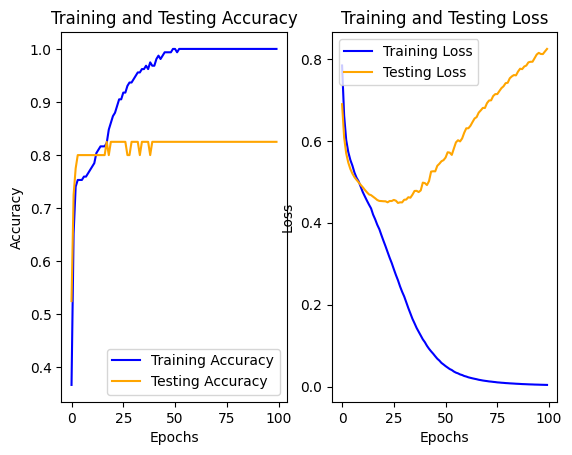

<Figure size 1200x600 with 0 Axes>

In [22]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

## L1 Regularization

In [23]:
# Regularization strength
lambda_val = 0.001

In [24]:
# Define the feedforward neural network model with L1 regularization
model_l1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l1(lambda_val)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l1(lambda_val)),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l1(lambda_val)),
    Dense(1, activation='sigmoid')
])

# Compile the model with L1 regularization
model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with L1 regularization
history_l1 = model_l1.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))


Epoch 1/100


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.6110 - loss: 6415.9463 - val_accuracy: 0.5500 - val_loss: 1.2844
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5133 - loss: 3059.3445 - val_accuracy: 0.6250 - val_loss: 1.2633
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7354 - loss: 7514.0786 - val_accuracy: 0.6250 - val_loss: 1.2492
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6217 - loss: 4563.9487 - val_accuracy: 0.6000 - val_loss: 1.2351
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7428 - loss: 4059.9207 - val_accuracy: 0.6500 - val_loss: 1.2164
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7819 - loss: 5395.3350 - val_accuracy: 0.6000 - val_loss: 1.2053
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6553 - loss: 2613.9724 - val_accuracy: 0.5750 - val_loss: 1.1967
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6502 - loss: 2542.9026 - val_accuracy: 0.6000

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


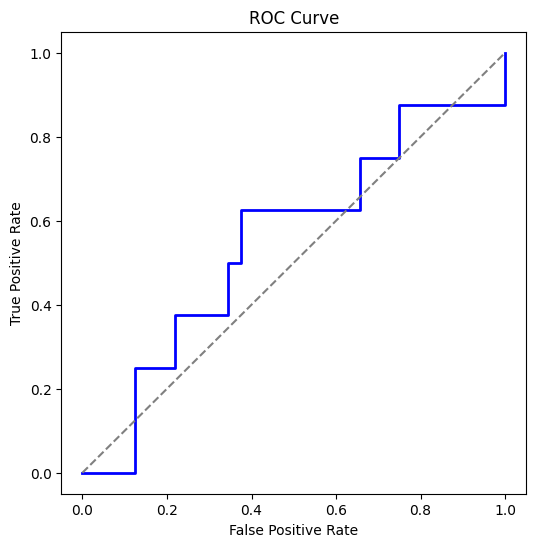

In [25]:
# Generate ROC curve
y_pred_prob = model_l1.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

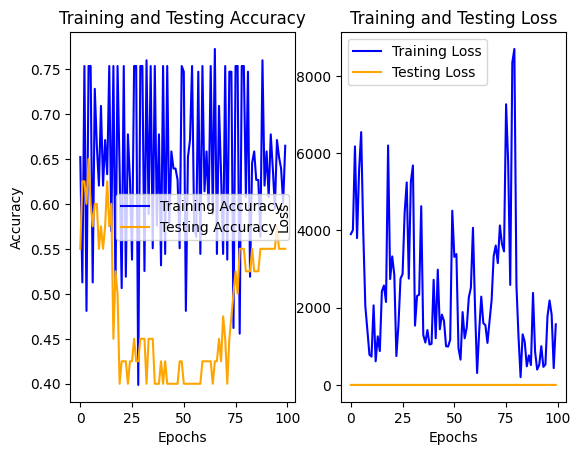

<Figure size 1200x600 with 0 Axes>

In [26]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history_l1.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_l1.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history_l1.history['loss'], label='Training Loss', color='blue')
plt.plot(history_l1.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

In [27]:
# Evaluate the model on the testing set
loss, accuracy = model_l1.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

# Generate confusion matrix
y_pred = np.round(y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5646 - loss: 0.9414
Classification Loss: 0.9483572840690613
Classification Accuracy: 0.550000011920929
AUC Score: 0.55078125
Confusion Matrix:
[[17 15]
 [ 3  5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.53      0.65        32
           1       0.25      0.62      0.36         8

    accuracy                           0.55        40
   macro avg       0.55      0.58      0.51        40
weighted avg       0.73      0.55      0.59        40



## L2 Regularization

In [28]:
# Define the feedforward neural network model with L2 regularization
model_l2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(lambda_val)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(lambda_val)),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(lambda_val)),
    Dense(1, activation='sigmoid')
])

# Compile the model with L2 regularization
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with L2 regularization
history_l2 = model_l2.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.2403 - loss: 134037.3125 - val_accuracy: 0.2500 - val_loss: 0.8745
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2589 - loss: 57294.8203 - val_accuracy: 0.3750 - val_loss: 0.8253
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7437 - loss: 5019.3760 - val_accuracy: 0.4500 - val_loss: 0.7951
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7741 - loss: 8198.8359 - val_accuracy: 0.5000 - val_loss: 0.7832
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7784 - loss: 8143.4121 - val_accuracy: 0.4000 - val_loss: 0.7857
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7429 - loss: 4521.1294 - val_accuracy: 0.4000 - val_loss: 0.7971
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2503 - loss: 4717.0723 - val_accuracy: 0.4750 - val_loss: 0.7852
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7537 - loss: 2831.2698 - val_a

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


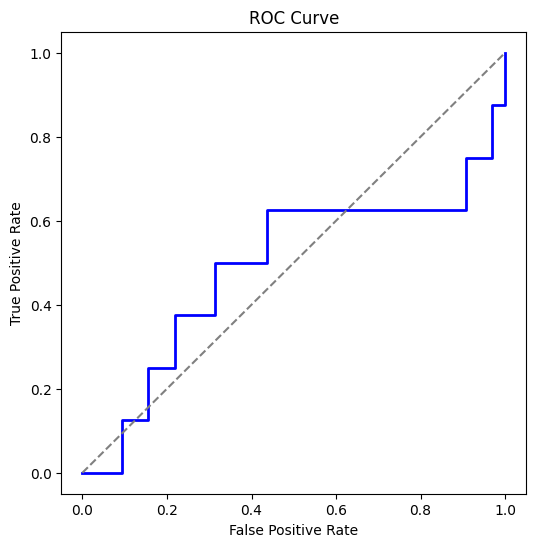

In [30]:
# Generate ROC curve
y_pred_prob = model_l2.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

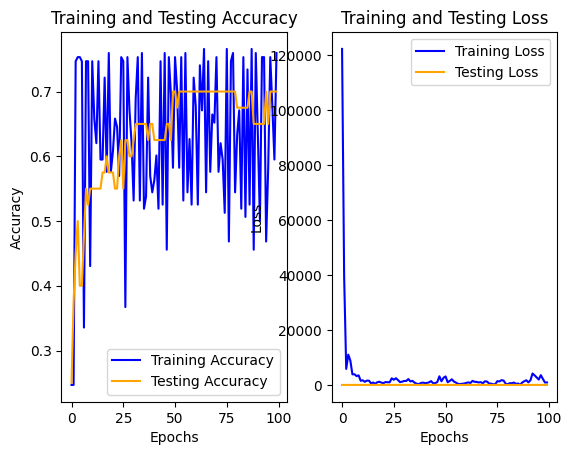

<Figure size 1200x600 with 0 Axes>

In [31]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history_l2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_l2.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history_l2.history['loss'], label='Training Loss', color='blue')
plt.plot(history_l2.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

In [32]:
# Evaluate the model on the testing set
loss, accuracy = model_l2.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

# Generate confusion matrix
y_pred = np.round(y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6958 - loss: 0.7132
Classification Loss: 0.7114759087562561
Classification Accuracy: 0.699999988079071
AUC Score: 0.48828125
Confusion Matrix:
[[25  7]
 [ 5  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        32
           1       0.30      0.38      0.33         8

    accuracy                           0.70        40
   macro avg       0.57      0.58      0.57        40
weighted avg       0.73      0.70      0.71        40



## Dropout Regularization

In [33]:
# Define the feedforward neural network model with dropout regularization
model_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with dropout regularization
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with dropout regularization
history_dropout = model_dropout.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))


Epoch 1/100


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.5379 - loss: 201288.1562 - val_accuracy: 0.4750 - val_loss: 0.6747
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5393 - loss: 120578.3047 - val_accuracy: 0.4750 - val_loss: 0.6696
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6093 - loss: 58930.8047 - val_accuracy: 0.4500 - val_loss: 0.6674
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5549 - loss: 60666.8164 - val_accuracy: 0.4500 - val_loss: 0.6627
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5571 - loss: 56308.9258 - val_accuracy: 0.4750 - val_loss: 0.6598
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6357 - loss: 22212.9004 - val_accuracy: 0.5000 - val_loss: 0.6577
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6598 - loss: 46079.8711 - val_accuracy: 0.5250 - val_loss: 0.6545
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5876 - loss: 50476.6406 - val_accura

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


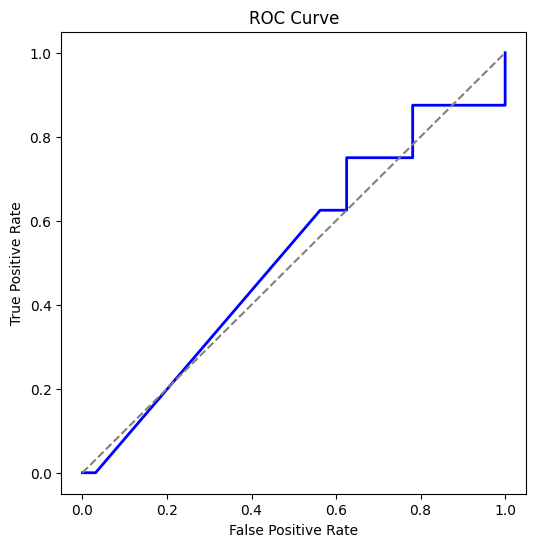

In [35]:
# Generate ROC curve
y_pred_prob = model_dropout.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

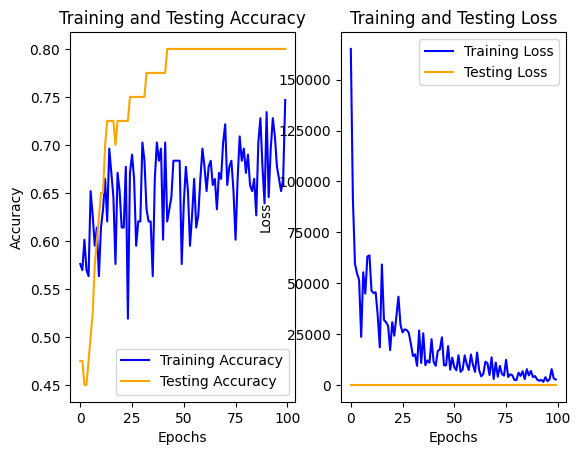

<Figure size 1200x600 with 0 Axes>

In [36]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_dropout.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['loss'], label='Training Loss', color='blue')
plt.plot(history_dropout.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

In [37]:
# Evaluate the model on the testing set
loss, accuracy = model_dropout.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

# Generate confusion matrix
y_pred = np.round(y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8042 - loss: 0.6166  
Classification Loss: 0.619317889213562
Classification Accuracy: 0.800000011920929
AUC Score: 0.513671875
Confusion Matrix:
[[32  0]
 [ 8  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        32
           1       0.00      0.00      0.00         8

    accuracy                           0.80        40
   macro avg       0.40      0.50      0.44        40
weighted avg       0.64      0.80      0.71        40



C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

## Early Stopping

In [38]:
# Use the unregularized model (classification_model in this example)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history_early_stopping = classification_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6919 - loss: 303671.2500 - val_accuracy: 0.7000 - val_loss: 0.8010
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3973 - loss: 280969.9062 - val_accuracy: 0.8250 - val_loss: 0.6957
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7853 - loss: 194435.5938 - val_accuracy: 0.8000 - val_loss: 0.6872
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6977 - loss: 207286.2969 - val_accuracy: 0.7250 - val_loss: 0.7989
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4417 - loss: 107591.2969 - val_accuracy: 0.7500 - val_loss: 0.7252
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7810 - loss: 102935.3281 - val_accuracy: 0.7750 - val_loss: 0.7488


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


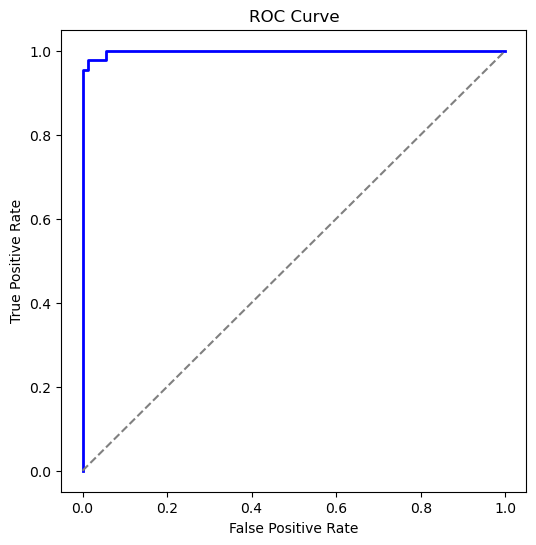

In [58]:
# Generate ROC curve
y_pred_prob = classification_model.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

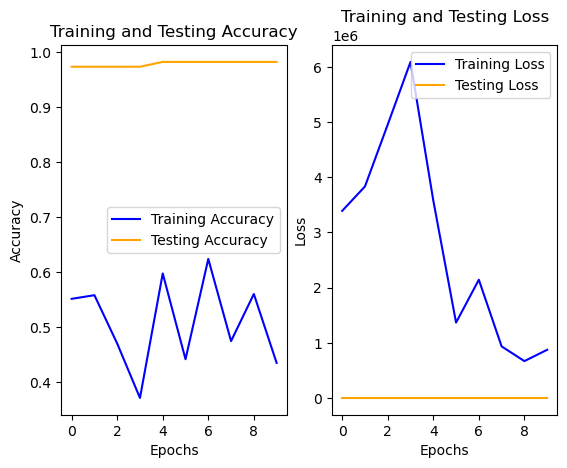

<Figure size 1200x600 with 0 Axes>

In [59]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history_early_stopping.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_early_stopping.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history_early_stopping.history['loss'], label='Training Loss', color='blue')
plt.plot(history_early_stopping.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

In [60]:
# Evaluate the model on the testing set
loss, accuracy = classification_model.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

# Generate confusion matrix
y_pred = np.round(y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9794 - loss: 0.1138 
Classification Loss: 0.07034007459878922
Classification Accuracy: 0.9824561476707458
AUC Score: 0.9983622666229938
Confusion Matrix:
[[71  0]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

